# Vessel 2 Analysis

### Analysis Scope and Data Resampling

In this analysis, we focus on key performance indicators (KPIs) essential for evaluating the operational efficiency and performance trends of Vessel 2. The dataset is structured as time-series data, where observations are recorded at regular intervals. To facilitate insightful analysis, the data has been resampled into different time intervals: hourly, daily, and monthly averages. This approach helps in identifying trends and patterns across varying time scales.Mostly we are taking montly averages to know if there is large scale difference but when it comes to analyse on hourly bases then daily averages data is used.

#### Selected Columns and Focus

In this analysis, we focus on a subset of columns from the dataset that are crucial for understanding and evaluating the performance of Vessel 2. Each selected column provides key insights into different aspects of the vessel's operation and efficiency:

- **Power Generation and Consumption:**
  - **Diesel Generator Power (1-4):** These columns provide insights into the energy production capacity onboard, essential for propulsion and powering various systems.
  - **Power Service (MW) & Power Galley (MW) (1-2) :** This column reflects the total electrical power consumed for ship-wide services, indicating operational demands and efficiency.

- **Propulsion and Speed:**
  - **Propulsion Power (MW):** This column indicates the total power used for propulsion, crucial for assessing the vessel's speed and efficiency in navigation.
  - **Speed Through Water (knots):** Speed is a critical metric for performance evaluation, influencing fuel consumption and operational efficiency.

- **Fuel Consumption and Efficiency:**
  - **Main Engine Fuel Flow Rates (1-4):** These columns quantify the fuel consumption rates of the main engines, directly impacting operational costs and environmental footprint.
  - **Boiler Fuel Flow Rates (1-2):** Essential for monitoring fuel consumption related to steam generation, contributing to overall efficiency metrics.

- **Environmental and Operational Factors:**
  - **Sea Temperature (Celsius):** Influences the operation of HVAC systems and overall vessel comfort, reflecting environmental conditions.
  - **HVAC Chillers Power (1-3):** These columns indicate the power consumption of HVAC chillers, which is responsive to sea temperature changes and essential for maintaining onboard comfort.

These selected columns are instrumental in assessing Vessel 1's operational efficiency, performance metrics compliance with international regulations, and overall energy management. By focusing on these specific variables, we gain comprehensive insights into the vessel's operational dynamics and efficiency improvements.


### Data Loading and Preprocessing
Loading and preprocess the dataset, ensuring it's ready for analysis.

#### Instructions:
1. Please set the correct path for the dataset file in the cell below.
2. Ensure that the file path is correct for your local system.

The data loaded is the data which was dowloaded after runing the Data_Cleaning notebook.

In [1]:
# Import necessary utilities and load data
from utilities import *
file_path = r"C:\Users\jeeva\Downloads\Cruises_performance_analysis\Cruise_ship_analysis\data\vessel2_cleaned.csv"
vessel2_data_filled = load_data(file_path)

# Convert date columns
date_columns = ['Start Time', 'End Time']
convert_dates(vessel2_data_filled, date_columns)

# Drop unnecessary columns and set index
vessel2_data_filled.drop(columns=['Vessel Name'], inplace=True)
vessel2_data_filled.set_index('Start Time', inplace=True)


##### Resampling Data
Resample the data into different time intervals for analysis.

In [2]:
# Resample the data for different intervals
resampled_5min = vessel2_data_filled.resample('5T').mean()
resampled_hourly = vessel2_data_filled.resample('H').mean()
resampled_daily = vessel2_data_filled.resample('D').mean()
resampled_weekly = vessel2_data_filled.resample('W').mean()
resampled_monthly = vessel2_data_filled.resample('M').mean()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_60524\245983703.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_5min = vessel2_data_filled.resample('5T').mean()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_60524\245983703.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_hourly = vessel2_data_filled.resample('H').mean()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_60524\245983703.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

# Power Generation and Consumption Analysis
In this section, we delve into the critical aspects of power generation and consumption, pivotal to understanding the performance trends in maritime operations. The production and utilization of power are fundamental components influencing operational efficiency and sustainability aboard ships.

**Key Components of Power Generation:**

Two primary sources contribute significantly to onboard power generation:

- **Diesel Generators:** These systems play a central role in producing electrical power essential for various shipboard operations.
- **Main Engines:** Beyond propulsion, main engines also contribute to onboard power generation, supporting auxiliary systems and operational requirements.

**Focus Areas for Analysis:**

Our analysis will primarily concentrate on columns representing power consumption and generation in megawatts (MW). These metrics offer insights into the operational dynamics, energy efficiency, and performance trends crucial for maritime vessels.

By examining these aspects meticulously, we aim to uncover nuanced patterns and operational efficiencies that contribute to enhancing overall ship performance and compliance with operational standards.

________________________________________________________________________________________________________________________________________
#### 1. Analysis of Diesel Generator Power and Main Engine Fuel Flow Rate

In this section, we explore the relationship between diesel generator power generation and main engine fuel flow rates, both critical aspects of maritime vessel operations. The graph below illustrates their trends over time, showcasing their respective contributions to onboard energy dynamics.

**Graph Description:**

The graph is divided into two rows:
- **First Row (Diesel Generators):** Displays the power output (in MW) of each diesel generator over time. Each subplot represents a different diesel generator unit.
- **Second Row (Main Engines):** Shows the fuel flow rate (in kg/h) for each main engine across the same time intervals. Similarly, each subplot represents a different main engine unit.


##### Result and Interpretation

Understanding the Correlation between Diesel Generator Power and Main Engine Fuel Flow Rates

In ship operations, there is a strong correlation between diesel generator power (MW) and main engine fuel flow rates (kg/h). This correlation indicates how changes in one variable tend to align with changes in the other:

**Key Points:**
- **Operational Relationship:** Diesel generators produce electrical power needed for ship operations, influencing their power output based on onboard demands.
- **Fuel Consumption Response:** Main engines adjust fuel flow rates to meet varying power demands, leading to a closely correlated relationship.
- **Complex Dynamics:** This correlation reflects operational strategies and environmental conditions impacting both power generation and fuel consumption.

**Understanding Causation:**
- **Interpreting Relationships:** While correlation is clear, it doesn't imply direct causation. Factors like operational needs and environmental conditions influence both variables independently.
- **Optimizing Efficiency:** Understanding this correlation helps optimize energy use onboard, balancing operational requirements and efficiency goals effectively.

This understanding aids in optimizing ship performance and energy management, leveraging insights into operational dependencies without assuming direct cause-and-effect relationships.


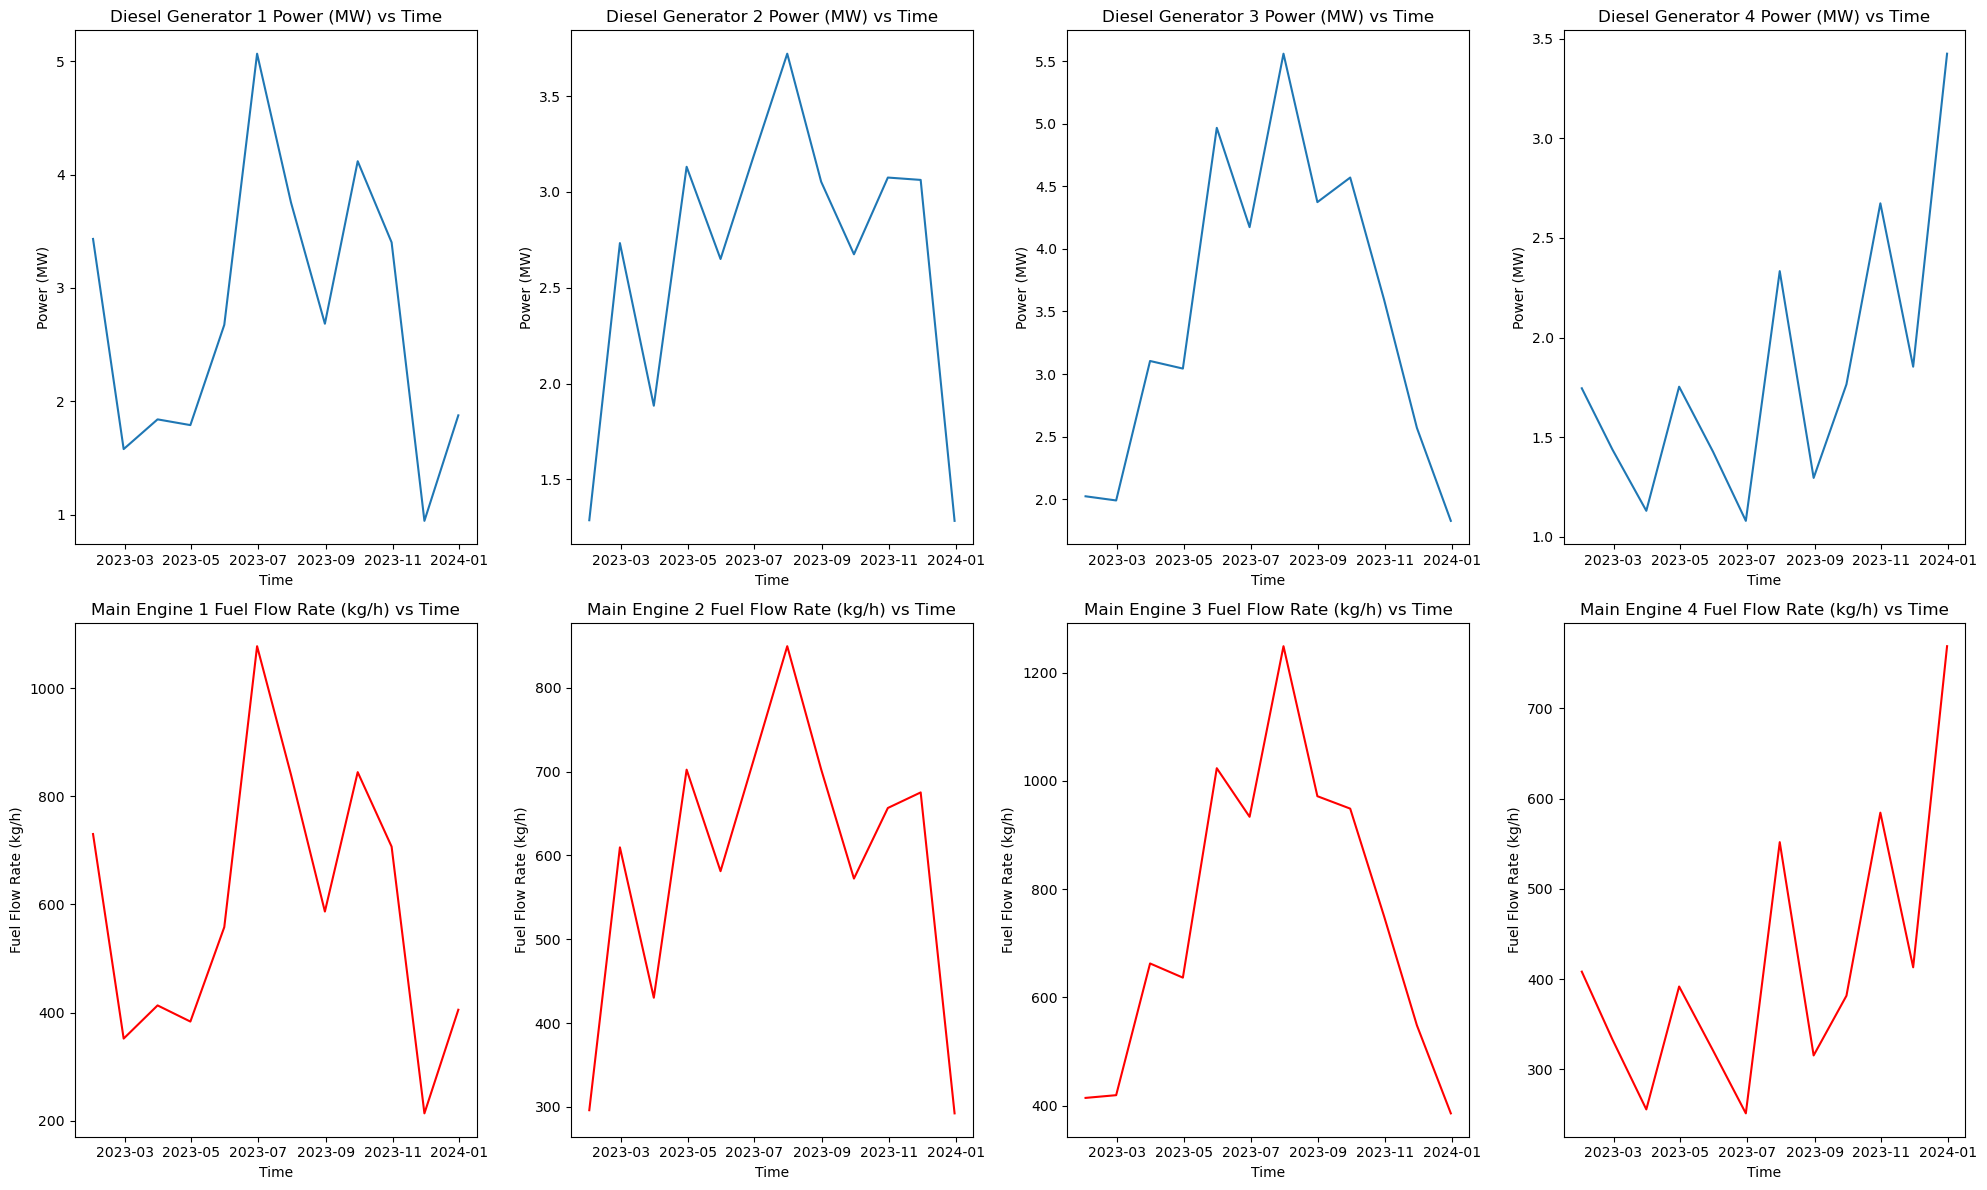

In [3]:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Plotting for Diesel Generators (first row)
for i, col in enumerate(['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)', 
                         'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']):
    row = 0  # First row for Diesel Generators
    ax = axes[row, i]
    ax.plot(resampled_monthly.index, resampled_monthly[col])
    ax.set_title(f'{col} vs Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Power (MW)')

# Plotting for Main Engines (second row)
for i, col in enumerate(['Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)', 
                         'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)']):
    row = 1  # Second row for Main Engines
    ax = axes[row, i]
    ax.plot(resampled_monthly.index, resampled_monthly[col],color = 'red')
    ax.set_title(f'{col} vs Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel Flow Rate (kg/h)')

# Adjust layout and display
plt.tight_layout()
plt.show()

---


#### 2. Analysis of Monthly Diesel Generator Power Generation
This heatmap and line plot illustrate the monthly power generation from four diesel generators (Diesel Generator 1 to 4) aboard the vessel. The visualization provides insights into their individual contributions and overall trends:

**1. Power Contribution Ranking:**
   - Diesel Generator 3 consistently exhibits the highest monthly power generation, followed by Diesel Generator 1, Diesel Generator 2, and then Diesel Generator 4.
   - This ranking suggests that Diesel Generator 3 is most efficient or possibly assigned higher operational load compared to the others.

**2. Complementary Operation:**
   - There appears to be a complementary relationship between Diesel Generator 1 and Diesel Generator 3. When one generator's output increases, the other may decrease, and vice versa. This suggests they may operate in tandem to balance load demands or operational strategies.
   - Similarly, Diesel Generator 2 and Diesel Generator 4 show a comparable complementary pattern.

**Reasons for Behavior:**
   - **Load Distribution:** The higher output of Diesel Generator 3 and Diesel Generator 1 could indicate they are assigned to critical or high-demand operations, such as propulsion or essential onboard systems.
   - **Maintenance Scheduling:** It's plausible that Diesel Generator 2 and Diesel Generator 4, with lower outputs, might be subjected to maintenance or operate under reduced load conditions during certain periods, impacting their monthly power generation.
   - **Operational Strategy:** The complementary nature between paired generators (3 and 1, 2 and 4) suggests deliberate operational strategies to optimize efficiency and reliability.



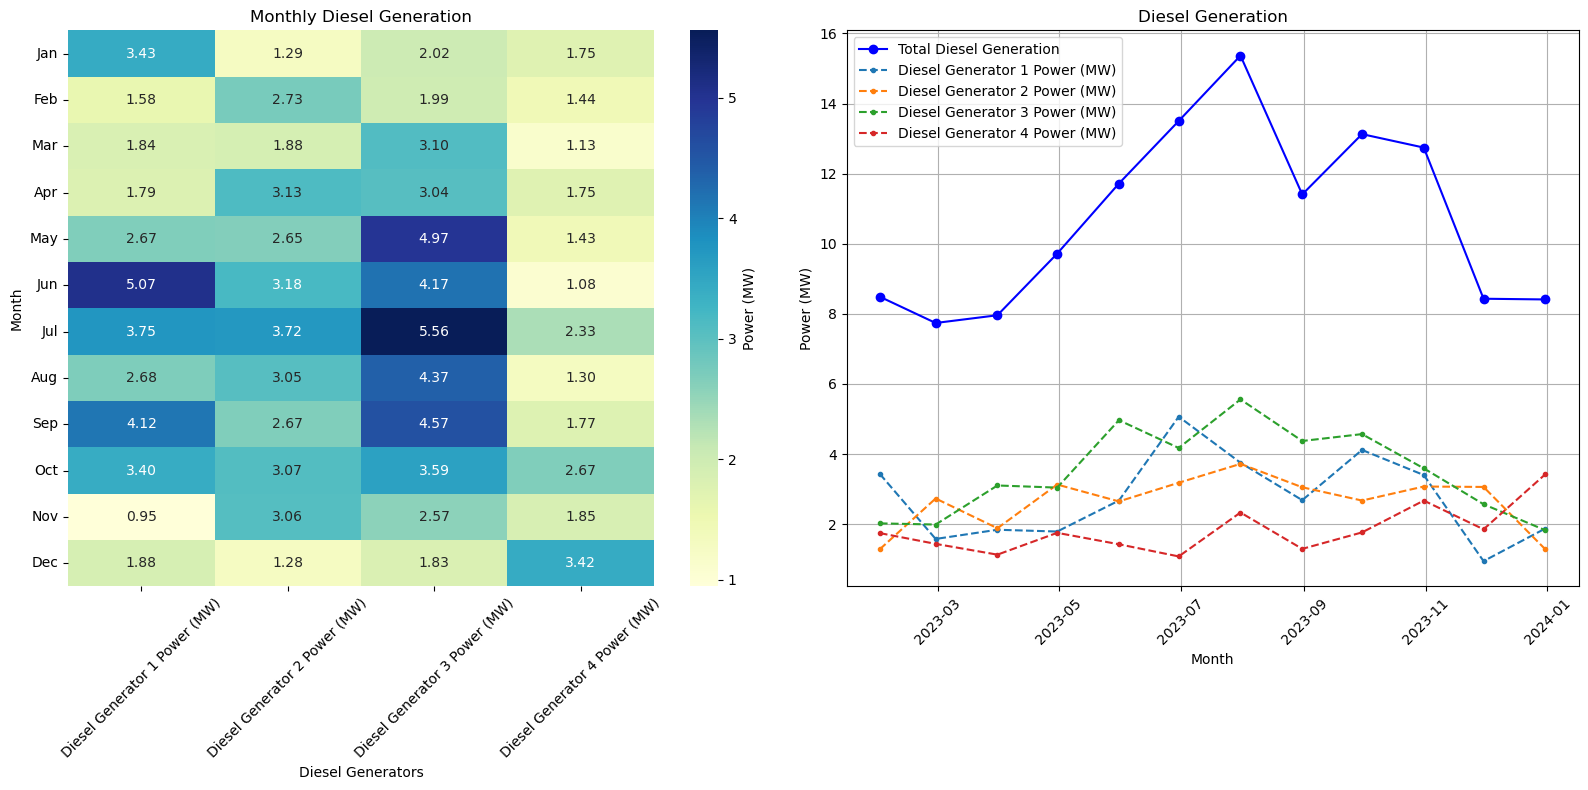

In [4]:

# Extract the relevant columns for diesel generation
generators = ['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
              'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']

# Extract the data for heatmap
monthly_data = resampled_monthly[generators]

# Create a heatmap
plt.figure(figsize=(16, 8))

# Plot heatmap
plt.subplot(1, 2, 1)
sns.heatmap(monthly_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Power (MW)'})
plt.title('Monthly Diesel Generation')
plt.xlabel('Diesel Generators')
plt.ylabel('Month')
plt.xticks(ticks=np.arange(len(generators))+0.5, labels=generators, rotation=45)
plt.yticks(ticks=np.arange(len(monthly_data.index))+0.5, labels=monthly_data.index.strftime('%b'))

# Plot line plot for total diesel generation over months
plt.subplot(1, 2, 2)
total_diesel_generation = monthly_data.sum(axis=1)
plt.plot(total_diesel_generation.index, total_diesel_generation.values, marker='o', linestyle='-', color='b', label='Total Diesel Generation')

# Plot individual diesel generators
for gen_col in generators:
    plt.plot(monthly_data.index, monthly_data[gen_col], marker='.', linestyle='--', label=gen_col)

plt.title('Diesel Generation')
plt.xlabel('Month')
plt.ylabel('Power (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


---
#### 3. Understanding Diesel-Generated Power Consumption

The pie chart visualizes the distribution of diesel-generated power consumption across different components onboard, excluding propulsion power. Key components considered include service rooms, HVAC chillers, and power galleys,scrubber power.

**1. Distribution of Power Consumption:**
   - **Service Rooms:** Consumes the highest proportion of diesel-generated power, accounting for 82.38% of the total. This indicates critical energy demand likely for essential onboard services.
   - **Scrubber Power:**Utilizes a significant portion of diesel-generated power 4.97%
   - **HVAC Chillers:** Utilizes a significant portion of diesel-generated power, contributing to maintaining comfortable temperatures onboard.
   - **Power Galley 2:** Requires moderate power compared to other components.
   - **Power Galley 1:** Utilizes the least amount of diesel-generated power, representing only 0.58% of the total.

**2. Reasons for Consumption Distribution:**
   - **Service Rooms:** Typically house essential equipment and infrastructure requiring continuous power supply for operational integrity.
   - **Scrubber Power:** it is typical as it needed more power to maintain the toxic gases production.
   - **HVAC Chillers:** Essential for maintaining temperature control within the vessel, essential for crew and equipment comfort and performance.
   - **Power Galley 2 and 1:** Power consumption is lower as they may not operate continuously or require lower power for operation compared to service and environmental control systems.

This analysis helps in understanding where the majority of diesel-generated power is allocated within the vessel, guiding operational decisions and energy management strategies to optimize efficiency and resource utilization.

C:\Users\jeeva\AppData\Local\Temp\ipykernel_60524\423993076.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size


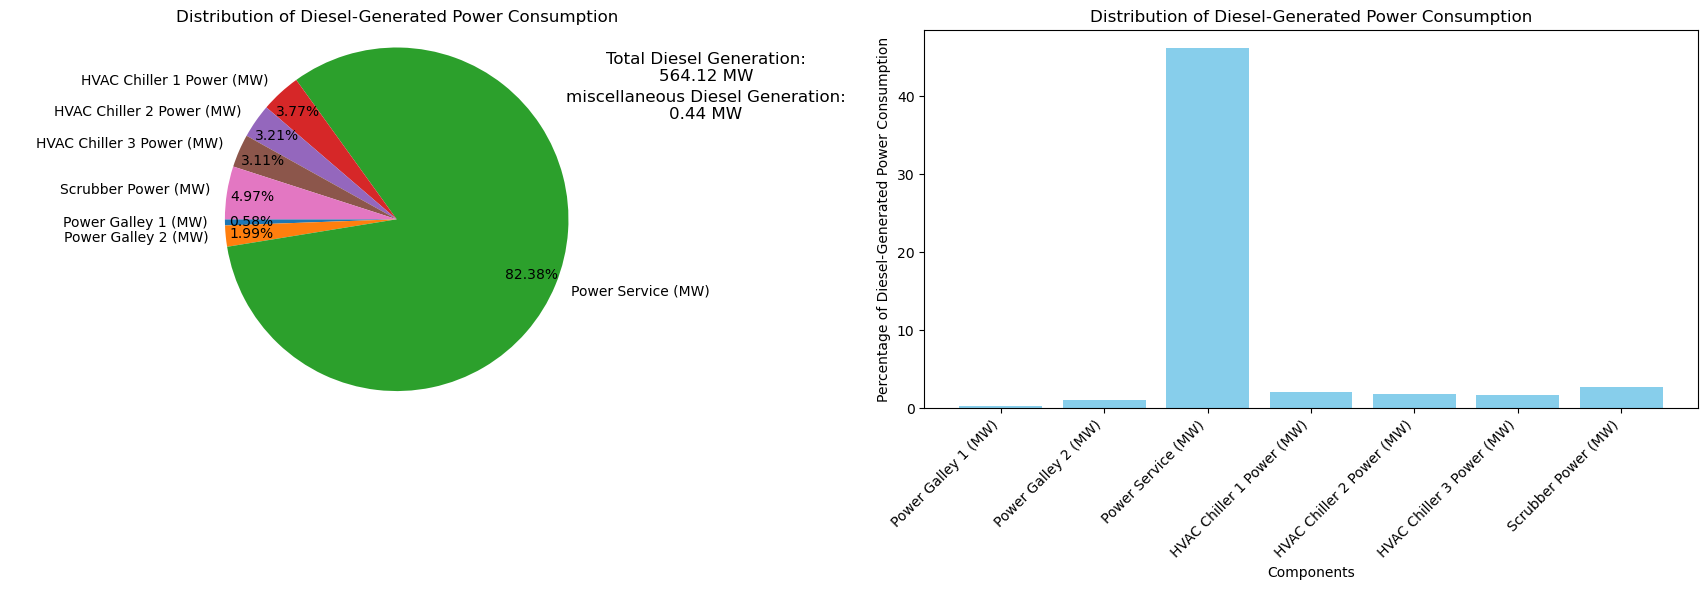

In [5]:
# Extract relevant columns
power_columns = [
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)',
    'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)', 'Scrubber Power (MW)',
    'Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
    'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)'
]

# Calculate total power consumption for each component
df_power_consumption = resampled_weekly[power_columns].sum()

# Calculate total diesel-generated power
total_diesel_power = df_power_consumption[
    ['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
     'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']
].sum()

# Define consumption columns for the charts
consumption_columns = [
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)',
    'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)','Scrubber Power (MW)'
]

# Calculate percentages of diesel-generated power consumption
diesel_power_consumption = df_power_consumption[consumption_columns] / total_diesel_power

# Calculate miscellaneous power (unused diesel generation)
miscellaneous_power = 1 - diesel_power_consumption.sum()

# Set up the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# Add total diesel generation annotation
total_annotation = f'Total Diesel Generation:\n{total_diesel_power:.2f} MW'
# Add miscellaneous power annotation
miscellaneous_annotation = f'miscellaneous Diesel Generation:\n{miscellaneous_power:.2f} MW'

# Plotting the pie chart
wedges, texts, autotexts = ax1.pie(diesel_power_consumption, labels=diesel_power_consumption.index,
                                   autopct='%1.2f%%', startangle=180, pctdistance=0.85)
ax1.annotate(total_annotation, xy=(0.9, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=12)
ax1.annotate(miscellaneous_annotation, xy=(0.90, 0.80), xycoords='axes fraction', ha='center', va='center', fontsize=12)
ax1.set_title('Distribution of Diesel-Generated Power Consumption')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting the bar chart
ax2.bar(diesel_power_consumption.index, diesel_power_consumption.values * 100, color='skyblue')
ax2.set_xlabel('Components')
ax2.set_ylabel('Percentage of Diesel-Generated Power Consumption')
ax2.set_title('Distribution of Diesel-Generated Power Consumption')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size

# Adjust layout and display
plt.tight_layout()
plt.show()


---

#### 4. Analysis of daily Power Generation and Consumption Trends

##### Diesel Generator Power Generation
The average power generation by diesel generators shows a distinct pattern over the day:
- **Midnight to Early Morning Surge:** Power generation increases sharply from midnight (00:00) to around 4 AM, possibly due to increased demand during early morning preparations or shift changes.
- **Morning Dip:** From 5 AM to 3 PM, there is a notable decrease in power generation, indicating lower demand during daytime operations.
- **Evening Peak:** Power generation picks up again after 4 PM, peaking towards nighttime, which could be attributed to increased evening activities or preparation for overnight operations.

##### Power Service Consumption
The average consumption of power by the service area exhibits the following trends:
- **Morning Spike:** There is a significant spike around 5 AM, likely due to morning routines or equipment startup.
- **Daytime Dip:** Consumption decreases gradually from early morning until around 3 PM, reflecting reduced daytime operational needs.
- **Evening Surge:** Consumption sharply increases again after 3 PM, peaking around 8-9 PM, possibly due to increased evening activities or higher operational demands.

##### Power Consumption by Galley (Power Galley 1 and Power Galley 2)
Power consumption patterns in Galley areas show the following trends:
- **Morning Fluctuations:** There are fluctuations or slight increases in consumption from 5 AM to 10 AM, possibly corresponding to meal preparation times or early morning activities.
- **Afternoon Dip:** Consumption tends to decrease towards midday, stabilizing until late afternoon.
- **Evening Increase:** Consumption rises again from around 3 PM, peaking towards the evening, which may be attributed to dinner preparation and evening activities.

##### Power Consumption by HVAC (HVAC Chiller 1, 2, and 3)
HVAC power consumption patterns indicate:
- **Morning to Afternoon Increase:** Consumption gradually increases from early morning to around 3 PM, reflecting the need for climate control during daytime hours.
- **Evening Decrease:** Consumption decreases towards the evening, possibly as outdoor temperatures cool down and demand for HVAC decreases.

##### Reasons for Observed Trends
These trends can be attributed to operational schedules, human activity patterns, and environmental conditions:
- **Operational Schedules:** Shift changes, meal preparation times, and daily routines influence power consumption and generation.
- **Human Activity Patterns:** Peak times align with periods of increased activity such as morning routines, meal times, and evening preparations.
- **Environmental Factors:** Temperature changes affecting HVAC demand and natural light influencing daily routines contribute to these observed trends.

Understanding these hourly trends is crucial for optimizing energy usage, scheduling maintenance, and ensuring efficient operation of the power systems onboard.



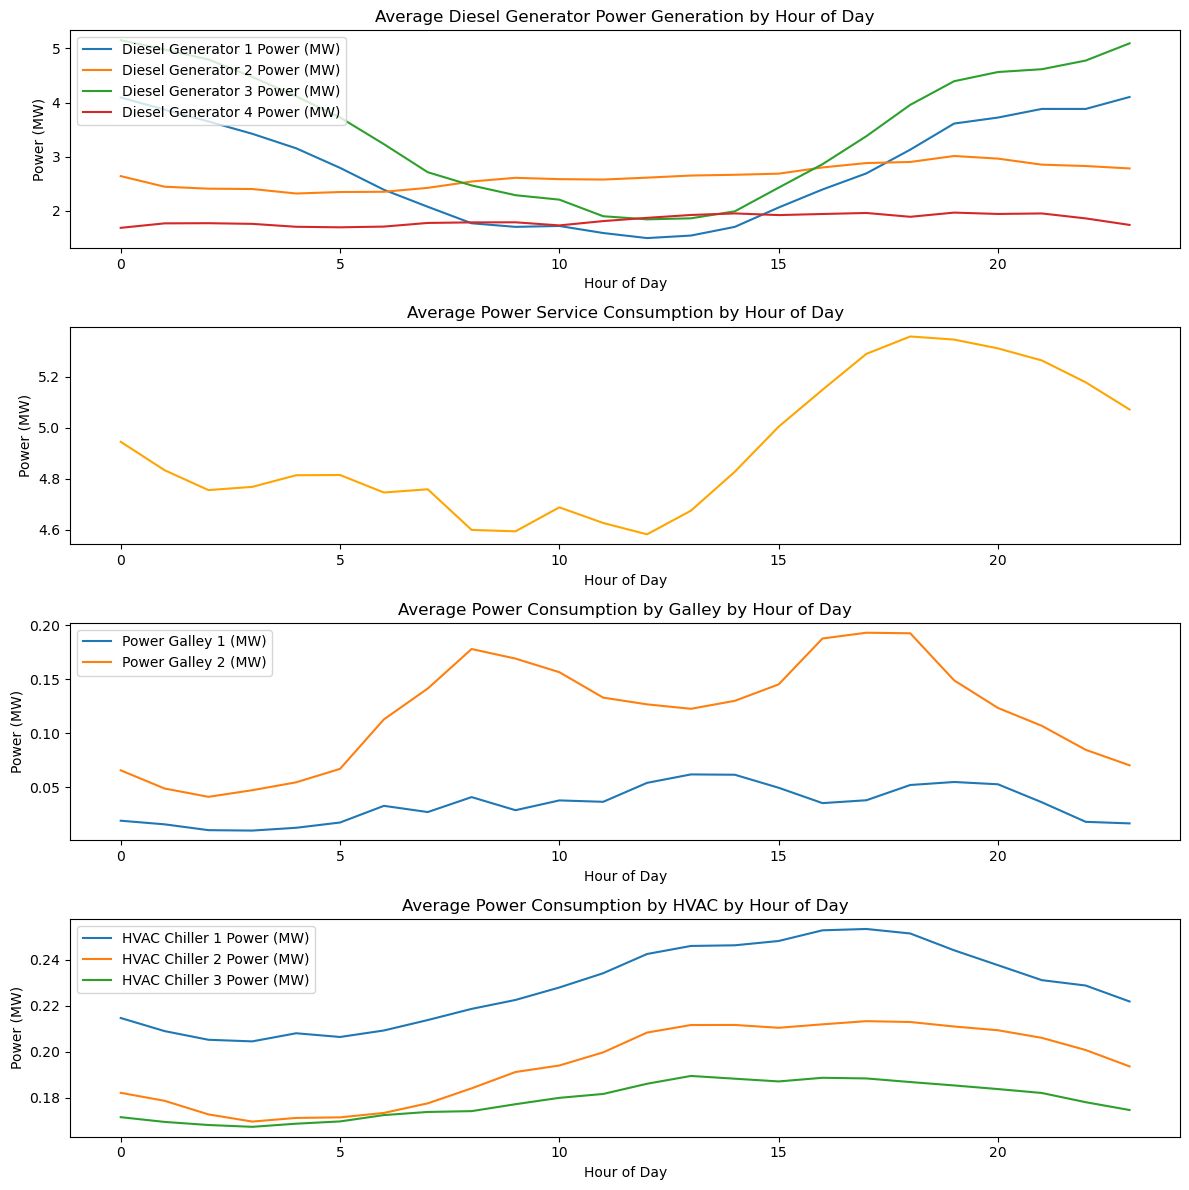

In [6]:
# Extract relevant columns
power_columns = [
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)',
    'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)',
    'Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
    'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)'
]

# Select only hourly data for analysis
hourly_data = resampled_hourly.copy()[power_columns]

# Extract hour of day for grouping
hourly_data['Hour'] = hourly_data.index.hour

# Group by hour and calculate mean for each hour
hourly_mean = hourly_data.groupby('Hour').mean()

# Plotting trends over the day
plt.figure(figsize=(12, 12))

# Plot diesel generator power generation
plt.subplot(4, 1, 1)
hourly_mean[['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
             'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']].plot(ax=plt.gca())
plt.title('Average Diesel Generator Power Generation by Hour of Day')
plt.ylabel('Power (MW)')
plt.xlabel('Hour of Day')
plt.legend(loc='upper left')

# Plot Power Service separately due to its larger scale
plt.subplot(4, 1, 2)
hourly_mean['Power Service (MW)'].plot(ax=plt.gca(), color='orange')
plt.title('Average Power Service Consumption by Hour of Day')
plt.ylabel('Power (MW)')
plt.xlabel('Hour of Day')

# Plot power consumption by Galley
plt.subplot(4, 1, 3)
hourly_mean[['Power Galley 1 (MW)', 'Power Galley 2 (MW)']].plot(ax=plt.gca())
plt.title('Average Power Consumption by Galley by Hour of Day')
plt.ylabel('Power (MW)')
plt.xlabel('Hour of Day')
plt.legend(loc='upper left')

# Plot power consumption by HVAC
plt.subplot(4, 1, 4)
hourly_mean[['HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)']].plot(ax=plt.gca())
plt.title('Average Power Consumption by HVAC by Hour of Day')
plt.ylabel('Power (MW)')
plt.xlabel('Hour of Day')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


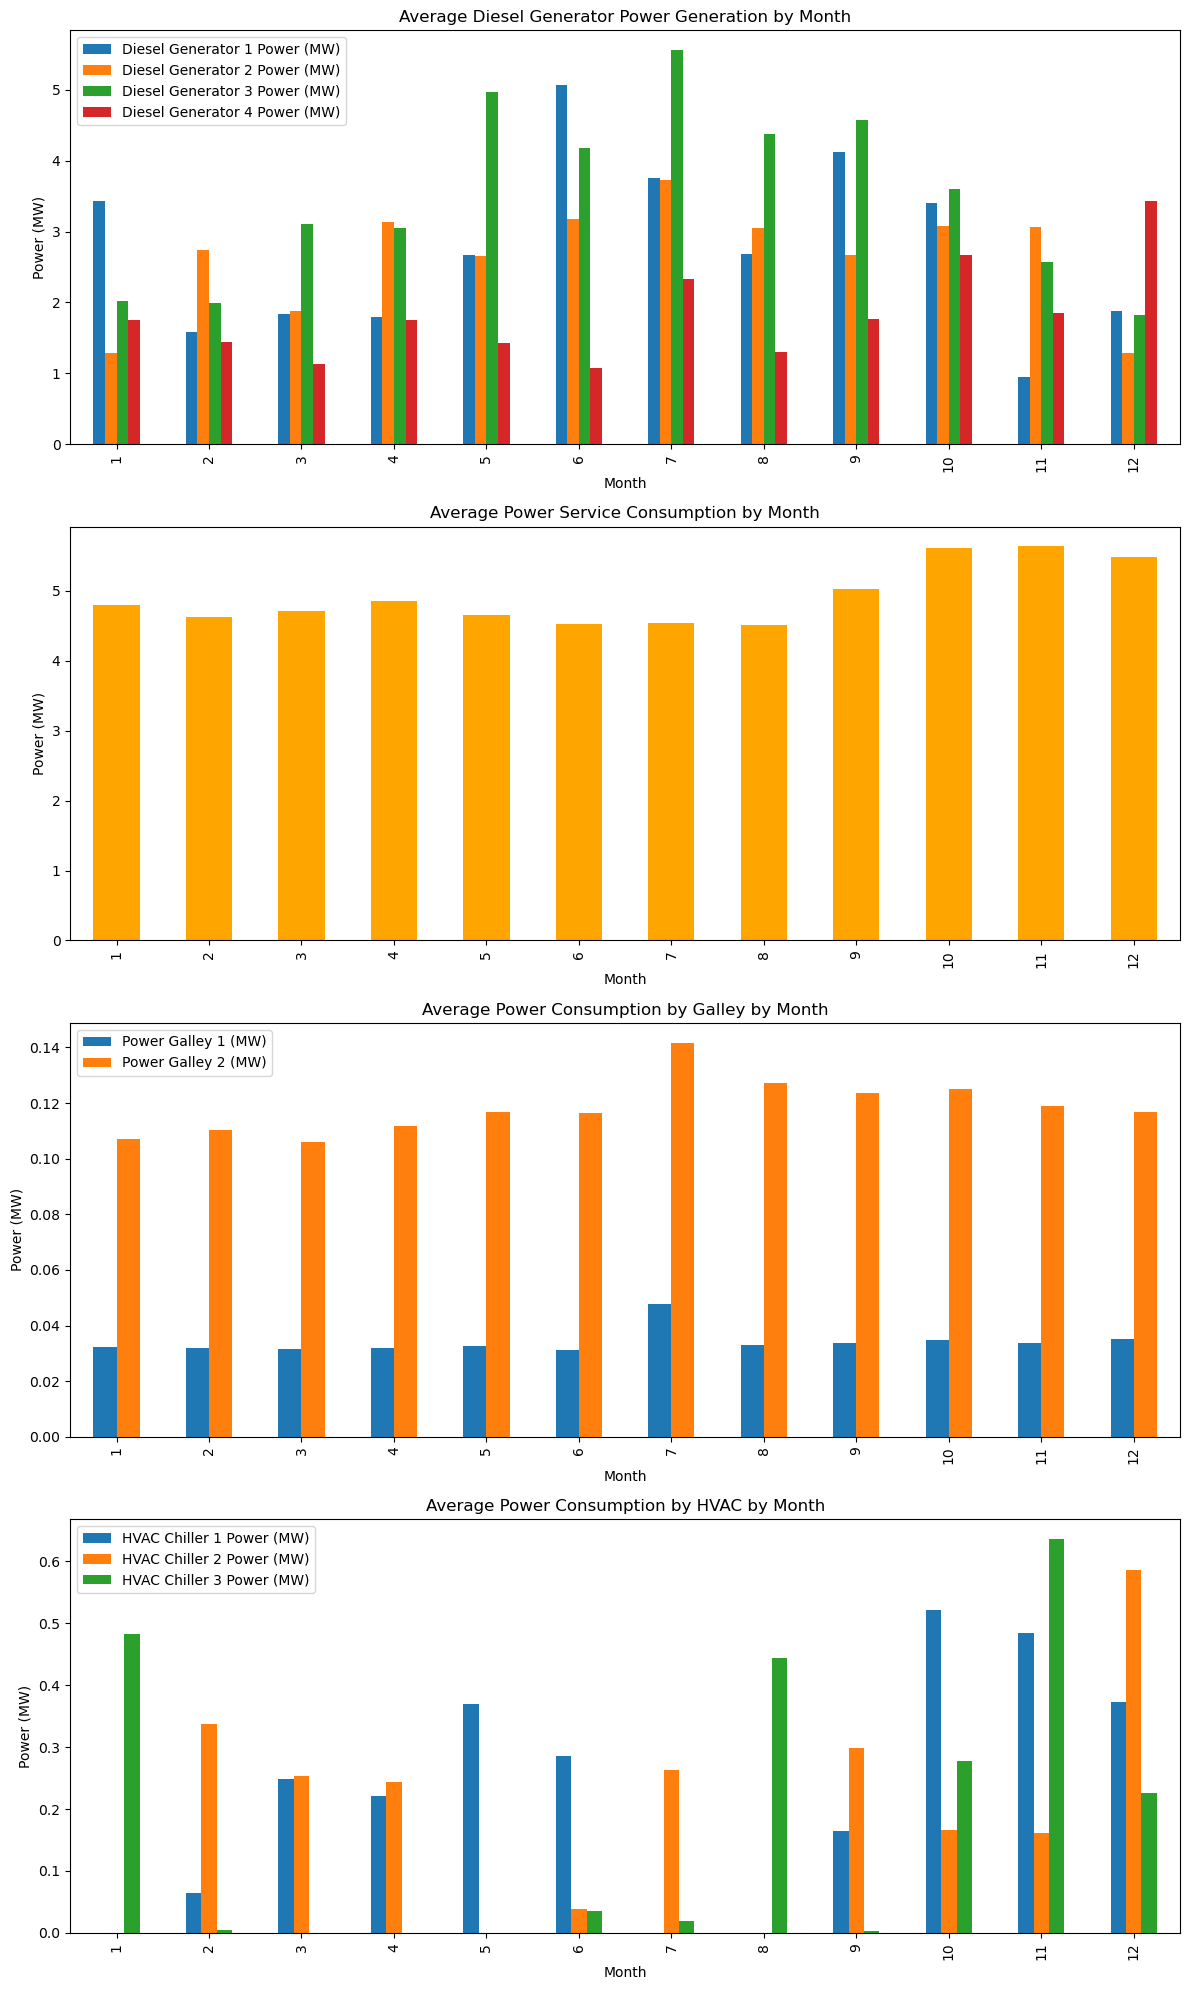

In [7]:

# Extract relevant columns for monthly analysis
power_columns = [
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)',
    'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)',
    'Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
    'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)'
]

# Select only monthly data for analysis
monthly_data = resampled_monthly.copy()[power_columns]

# Extract month for grouping
monthly_data['Month'] = monthly_data.index.month

# Group by month and calculate mean for each month
monthly_mean = monthly_data.groupby('Month').mean()

# Plotting trends over the months using bar plots
fig, axes = plt.subplots(4, 1, figsize=(12, 20))

# Plot diesel generator power generation
monthly_mean[['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)',
              'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Diesel Generator Power Generation by Month')
axes[0].set_ylabel('Power (MW)')
axes[0].set_xlabel('Month')
axes[0].legend(loc='upper left')

# Plot Power Service separately due to its larger scale
monthly_mean['Power Service (MW)'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Power Service Consumption by Month')
axes[1].set_ylabel('Power (MW)')
axes[1].set_xlabel('Month')

# Plot power consumption by Galley
monthly_mean[['Power Galley 1 (MW)', 'Power Galley 2 (MW)']].plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Power Consumption by Galley by Month')
axes[2].set_ylabel('Power (MW)')
axes[2].set_xlabel('Month')
axes[2].legend(loc='upper left')

# Plot power consumption by HVAC
monthly_mean[['HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)']].plot(kind='bar', ax=axes[3])
axes[3].set_title('Average Power Consumption by HVAC by Month')
axes[3].set_ylabel('Power (MW)')
axes[3].set_xlabel('Month')
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()


---

#### 5. Analysis of Proplusion Power Consumption and Fuel Flow Rate

#### Power Consumption Across Months
1. **Observations:**
   - The graph illustrates the variation in power consumption across different components over months.
   - Columns plotted include **Propulsion Power**, **Port Side Propulsion Power**, **Starboard Side Propulsion Power**, **Bow Thruster Powers**, and **Stern Thruster Powers**.
   - Power consumption shows fluctuations over time, reflecting operational demands or changes in usage patterns.

2. **Trends:**
   - **Propulsion Power**: Generally, shows peaks and troughs, potentially correlating with operational phases such as cruising or maneuvering.
   - **Thruster Powers**: Vary depending on the use of bow and stern thrusters for navigation and docking maneuvers.

#### Total Main Engines Fuel Flow Rate Across Months
1. **Observations:**
   - The second subplot displays the total fuel flow rate of all main engines combined across months.
   - Fuel flow rate indicates the amount of fuel consumed by the main engines over time.

2. **Trends:**
   - **Total Main Engine Fuel Flow**: Demonstrates fluctuations in fuel consumption, which may correspond to changes in operational activities or vessel speed requirements.
   - Peaks or valleys in fuel flow rate could reflect periods of high or low engine usage, potentially influenced by operational schedules or external factors.

#### Insights
- **Power Consumption vs. Fuel Flow Rate**: The relationship between power consumption and fuel flow rate is crucial for optimizing vessel performance and fuel efficiency.
- Monitoring these trends helps in identifying periods of high energy consumption or fuel consumption, enabling adjustments in operational strategies to improve efficiency.

### Conclusion
Analyzing power consumption and fuel flow rate trends over months provides valuable insights into vessel operations. By understanding these patterns, maritime operators can optimize fuel management strategies and enhance overall operational efficiency.


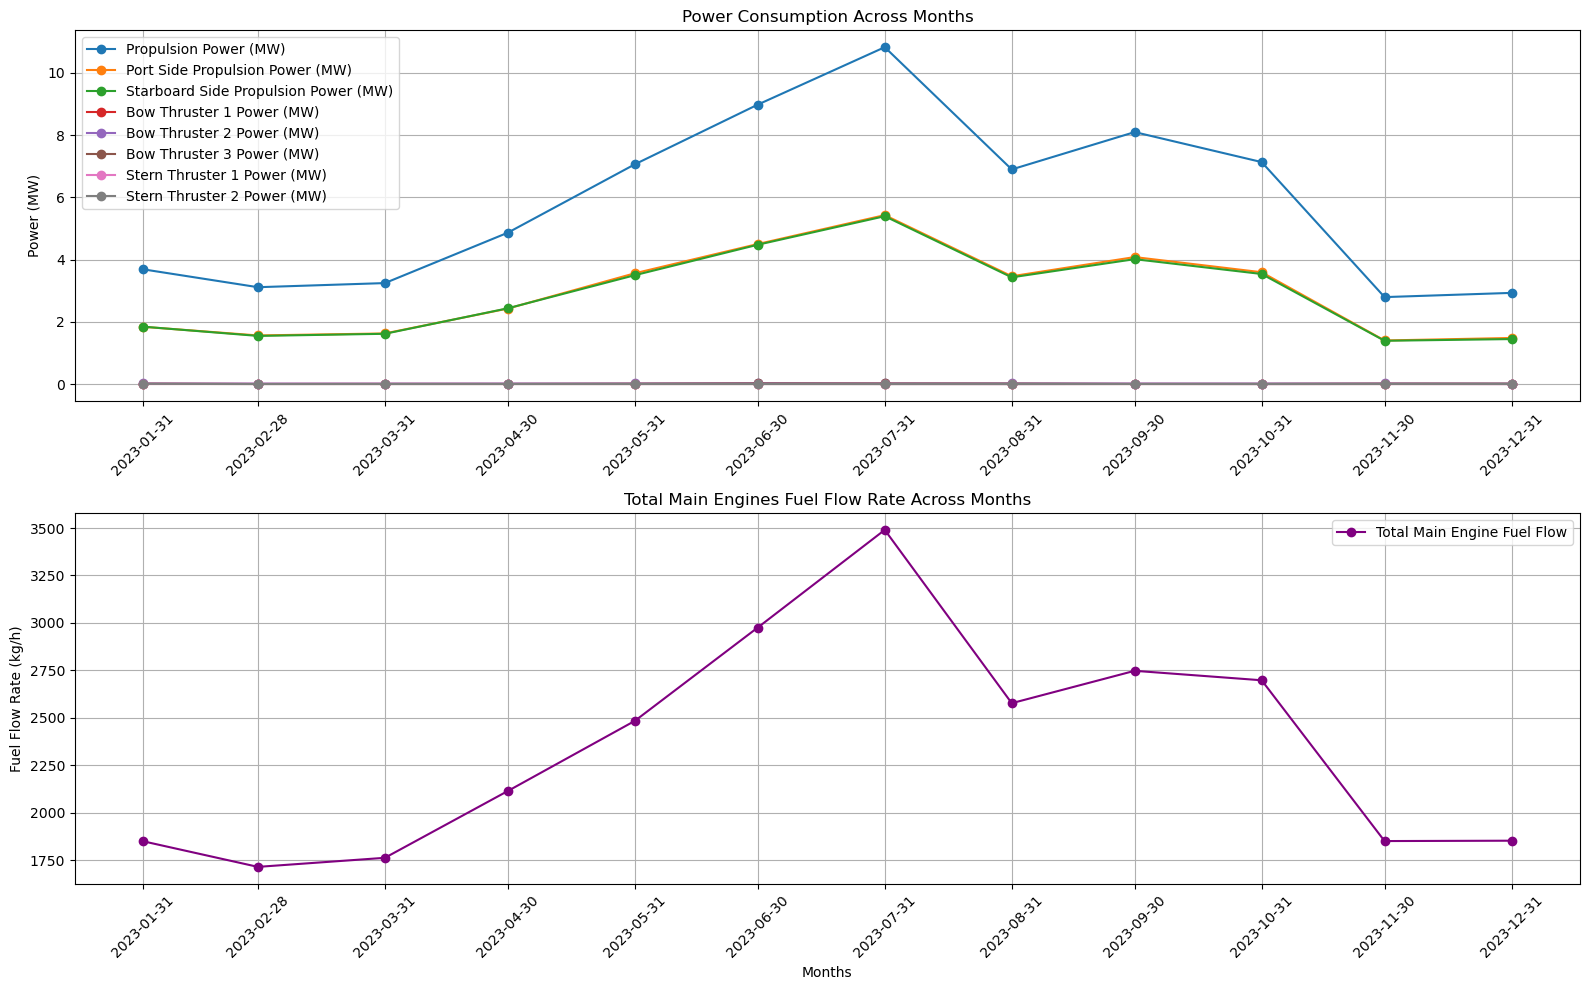

In [9]:

# Extract relevant columns
columns_of_interest = ['Propulsion Power (MW)', 'Port Side Propulsion Power (MW)',
                       'Starboard Side Propulsion Power (MW)', 'Bow Thruster 1 Power (MW)',
                       'Bow Thruster 2 Power (MW)', 'Bow Thruster 3 Power (MW)',
                       'Stern Thruster 1 Power (MW)', 'Stern Thruster 2 Power (MW)',
                       'Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)',
                       'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)']

# Resample monthly and calculate mean
#resampled_monthly = vessel_data[columns_of_interest].resample('M').mean()

# Summing the fuel flow rates of main engines
main_engine_fuel_total = resampled_monthly[['Main Engine 1 Fuel Flow Rate (kg/h)',
                                            'Main Engine 2 Fuel Flow Rate (kg/h)',
                                            'Main Engine 3 Fuel Flow Rate (kg/h)',
                                            'Main Engine 4 Fuel Flow Rate (kg/h)']].sum(axis=1)

# Adding the total to the resampled dataframe
resampled_monthly['Total Main Engine Fuel Flow (kg/h)'] = main_engine_fuel_total

# Plotting
plt.figure(figsize=(16, 10))

# Plotting propulsion and thrusters
plt.subplot(2, 1, 1)

# Plot each column related to power consumption
for column in columns_of_interest[:8]:
    plt.plot(resampled_monthly.index, resampled_monthly[column], marker='o', label=column)

plt.title('Power Consumption Across Months')
plt.ylabel('Power (MW)')
plt.xticks(resampled_monthly.index, rotation=45)
plt.legend()
plt.grid(True)

# Plotting total main engines' fuel flow rate
plt.subplot(2, 1, 2)
plt.plot(resampled_monthly.index, resampled_monthly['Total Main Engine Fuel Flow (kg/h)'], marker='o', color='purple', label='Total Main Engine Fuel Flow')
plt.title('Total Main Engines Fuel Flow Rate Across Months')
plt.xlabel('Months')
plt.ylabel('Fuel Flow Rate (kg/h)')
plt.xticks(resampled_monthly.index, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---
#### 6. Scrubber Power Analysis

This code visualizes the relationship between Scrubber Power and two other variables: 'Incinerator 1 Fuel Flow Rate (L/h) ,Propulsion Power, .

### Positive Correlation Explanation

  - **Incinerator 1 Fuel Flow Rate (L/h):** No much relation between these two.
- **Propulsion Power (MW):**
  - There is a negative correlation between scrubber power and propulsion power as higher propulsion typically requires more exhaust gas treatment to meet environmental regulations, leading to increased scrubber usage.
  
These plots help visualize the correlation and provide insight into how scrubber power consumption varies with changes in other operational parameters.



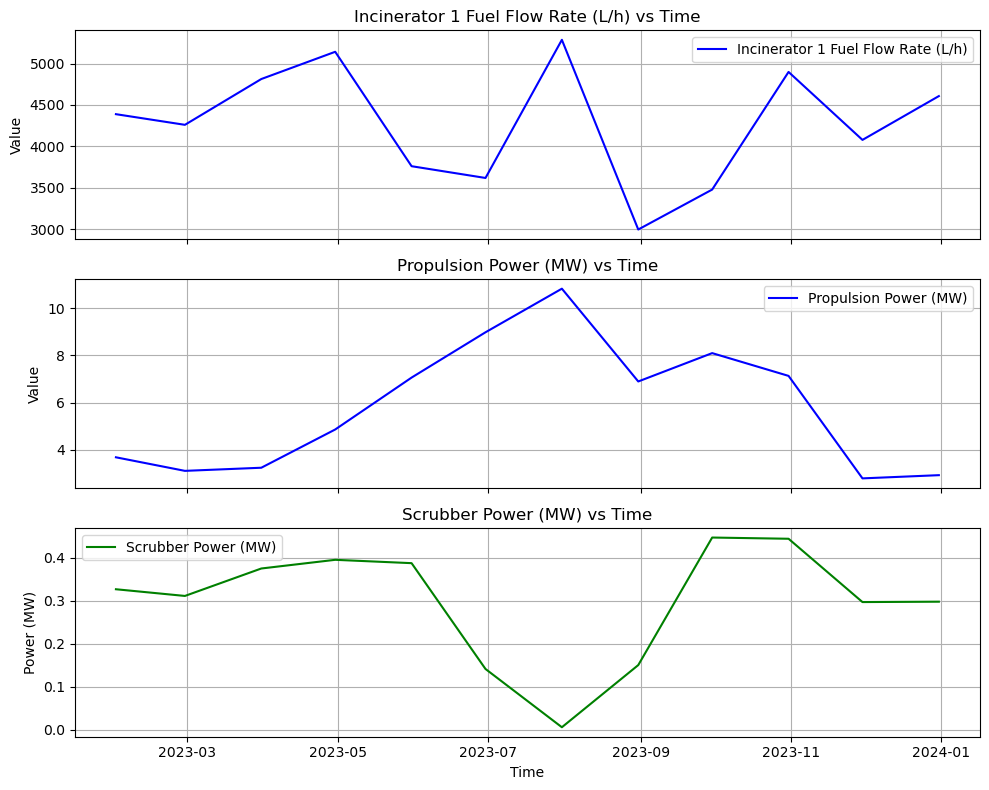

In [10]:
# Columns of interest for positive correlation with Scrubber Power
correlated_cols = [
    'Incinerator 1 Fuel Flow Rate (L/h)',
    'Propulsion Power (MW)'
]

# Create a figure with subplots, adding one more for Scrubber Power
fig, axes = plt.subplots(nrows=len(correlated_cols) + 1, ncols=1, figsize=(10, 8), sharex=True)

# Plot each correlated variable with Scrubber Power
for i, col in enumerate(correlated_cols):
    axes[i].plot(resampled_monthly.index, resampled_monthly[col], color='blue', label=col)
    axes[i].set_title(f'{col} vs Time')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)
    axes[i].legend()

# Plot Scrubber Power separately on the last subplot
scrubber_col = 'Scrubber Power (MW)'
axes[len(correlated_cols)].plot(resampled_monthly.index, resampled_monthly[scrubber_col], color='green', label=scrubber_col)
axes[len(correlated_cols)].set_title(f'{scrubber_col} vs Time')
axes[len(correlated_cols)].set_xlabel('Time')
axes[len(correlated_cols)].set_ylabel('Power (MW)')
axes[len(correlated_cols)].grid(True)
axes[len(correlated_cols)].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


## Efficiency and Fuel Consumption

#### 1. Specific Fuel Consumption (SFC) Analysis


##### What is SFC? (https://www.sustainable-ships.org/stories/2022/sfc)

Specific Fuel Consumption (SFC) measures engine efficiency, expressed in kilograms of fuel per megawatt-hour (kg/MWh). Lower SFC values indicate higher efficiency, meaning less fuel is needed to generate power.

##### Why Calculate SFC?

Calculating SFC helps to:
- Optimize fuel usage and reduce costs.
- Minimize emissions and comply with regulations.
- Identify engine maintenance needs.
- Make informed decisions on engine operation and fuel management.

##### How is SFC Calculated?

SFC is calculated using:
1. **Total Propulsion Power (MW)**: The total power generated by the propulsion system.
2. **Total Fuel Consumption (kg)**: The sum of fuel flow rates for all main engines.

The formula is:
\[ \text{SFC (kg/MW)} = \frac{\text{Total Fuel Consumption (kg)}}{\text{Total Propulsion Power (MW)}} \]

##### Calculation and Visualization

The code performs these steps:
1. Extracts propulsion power and fuel flow rates.
2. Copies data for calculations.
3. Calculates total propulsion power.
4. Calculates total fuel consumption.
5. Calculates SFC.
6. Plots monthly SFC trends.

### Observations

The graph shows:
- **January to June**: Gradual increase in SFC, indicating decreasing fuel efficiency.
- **July**: Sudden decrease, suggesting improved efficiency.
- **August to September**: Gradual decrease, indicating continued improvement.
- **October**: Sudden spike, suggesting a drop in efficiency.
- **November to December**: Decrease, indicating improved efficiency again.

### Possible Reasons for SFC Trends

- **January to June**: Seasonal changes may affect fuel efficiency due to varying weather conditions and operational demands.
- **July**: Maintenance or operational adjustments likely improve efficiency.
- **August to September**: Stabilized conditions lead to continued efficiency improvement.
- **October**: Operational changes or external factors (e.g., fuel quality) may cause efficiency drop.
- **November to December**: Return to normal operations and optimized conditions improve efficiency again.

Monitoring these trends allows for data-driven decisions to enhance engine performance and fuel efficiency.



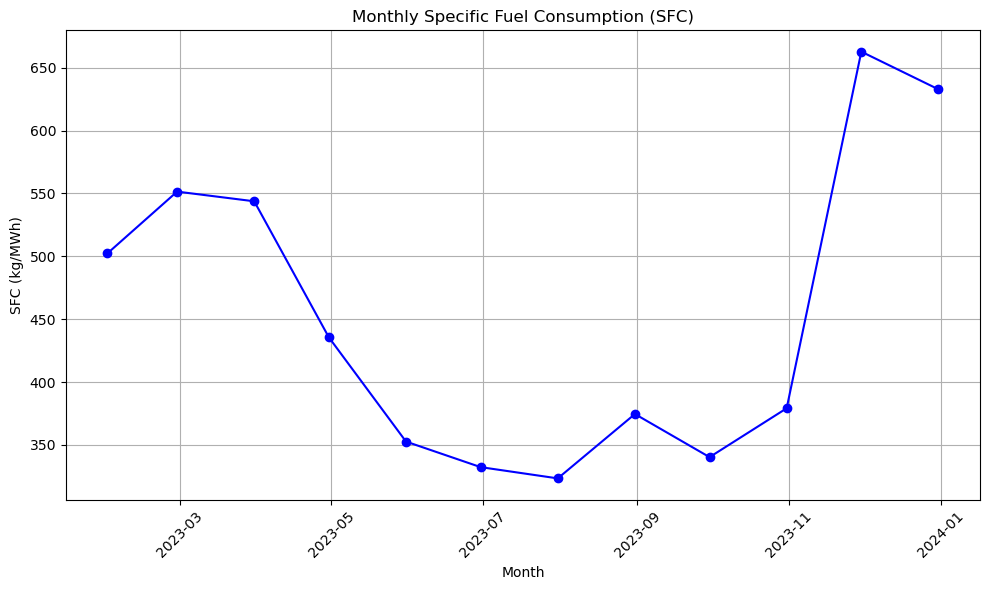

In [11]:

# Select relevant columns for SFC calculation
sfc_columns = [
    'Propulsion Power (MW)',  # or 'Port Side Propulsion Power (MW)', 'Starboard Side Propulsion Power (MW)'
    'Main Engine 1 Fuel Flow Rate (kg/h)',
    'Main Engine 2 Fuel Flow Rate (kg/h)',
    'Main Engine 3 Fuel Flow Rate (kg/h)',  # Include as needed for all main engines
    'Main Engine 4 Fuel Flow Rate (kg/h)'
]

# Copy the relevant data to a new DataFrame for calculation
sfc_data_monthly = resampled_monthly[sfc_columns].copy()

# Calculate total propulsion power consumption (MW) per month
sfc_data_monthly['Total Propulsion Power (MW)'] = sfc_data_monthly['Propulsion Power (MW)']  # or sum of 'Port Side Propulsion Power (MW)' and 'Starboard Side Propulsion Power (MW)'

# Calculate total fuel consumption (kg) per month
sfc_data_monthly['Total Fuel Consumption (kg)'] = sfc_data_monthly.iloc[:, 1:].sum(axis=1)  # Sum of all main engine fuel flow rates

# Calculate Specific Fuel Consumption (SFC) per month (kg/MW)
sfc_data_monthly['SFC (kg/MW)'] = sfc_data_monthly['Total Fuel Consumption (kg)'] / sfc_data_monthly['Total Propulsion Power (MW)']

# Plotting SFC trends over months
plt.figure(figsize=(10, 6))
plt.plot(sfc_data_monthly.index, sfc_data_monthly['SFC (kg/MW)'], marker='o', linestyle='-', color='b')
plt.title('Monthly Specific Fuel Consumption (SFC)')
plt.xlabel('Month')
plt.ylabel('SFC (kg/MWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Monthly Propulsion Efficiency Analysis

##### What is Propulsion Efficiency?

Propulsion Efficiency measures how effectively fuel is converted into propulsion power. It is calculated as the ratio of propulsion power (MW) to the total fuel flow rate (kg/h) of the main engines. Higher values indicate better efficiency.

##### Why Calculate Propulsion Efficiency?

Calculating propulsion efficiency helps to:
- Assess propulsion system performance.
- Identify fuel-saving opportunities.
- Optimize engine operations.
- Improve overall vessel efficiency and reduce costs.

##### Observations

The propulsion efficiency graph shows trends that are inversely related to the Specific Fuel Consumption (SFC) graph:
- **January to June**: Increase in SFC corresponds to a decrease in propulsion efficiency.
- **July**: Decrease in SFC corresponds to an increase in propulsion efficiency.
- **August to September**: Continued improvement in propulsion efficiency.
- **October**: Drop in efficiency as seen in the spike in SFC.
- **November to December**: Improvement in efficiency as SFC decreases.

##### Understanding SFC and Propulsion Efficiency Together

SFC and propulsion efficiency are interrelated:
- **SFC** measures fuel consumption per unit of power generated. Lower SFC indicates better efficiency.
- **Propulsion Efficiency** measures the amount of propulsion power generated per unit of fuel consumed. Higher propulsion efficiency indicates better fuel utilization.

Analyzing both metrics helps in:
- **Diagnosing Engine Performance**: Identifying periods of high or low efficiency and correlating them with operational changes or maintenance activities.
- **Optimizing Fuel Usage**: Implementing strategies to reduce fuel consumption and improve efficiency.
- **Monitoring Trends**: Understanding seasonal or operational trends affecting fuel consumption and propulsion efficiency.

By comparing SFC and propulsion efficiency, we gain a comprehensive understanding of engine performance, enabling informed decisions to enhance efficiency and reduce costs.


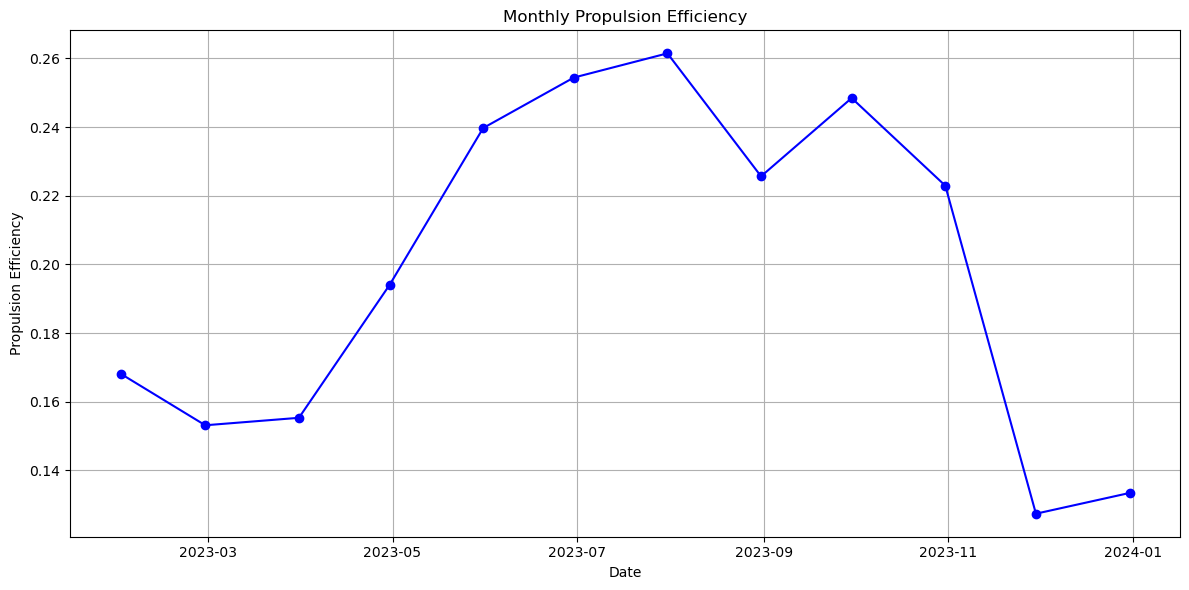

In [18]:
# Create a copy of resampled_monthly
resampled_monthly_copy = resampled_monthly.copy()

# Energy content of the fuel (MJ/kg)
energy_content_fuel = 42.7  # MJ/kg

# Calculate total fuel flow rate of main engines in the copied DataFrame
resampled_monthly_copy['Total Main Engine Fuel Flow Rate (kg/h)'] = resampled_monthly_copy[
    ['Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)',
     'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)']
].sum(axis=1)

# Calculate fuel power input (MW) per month
resampled_monthly_copy['Fuel Power Input (MW)'] = (resampled_monthly_copy['Total Main Engine Fuel Flow Rate (kg/h)'] * energy_content_fuel) / 3600

# Calculate propulsion efficiency in the copied DataFrame
resampled_monthly_copy['Propulsion Efficiency'] = resampled_monthly_copy['Propulsion Power (MW)'] / resampled_monthly_copy['Fuel Power Input (MW)']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resampled_monthly_copy.index, resampled_monthly_copy['Propulsion Efficiency'], marker='o', linestyle='-', color='b')
plt.title('Monthly Propulsion Efficiency')
plt.xlabel('Date')
plt.ylabel('Propulsion Efficiency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Propulsion

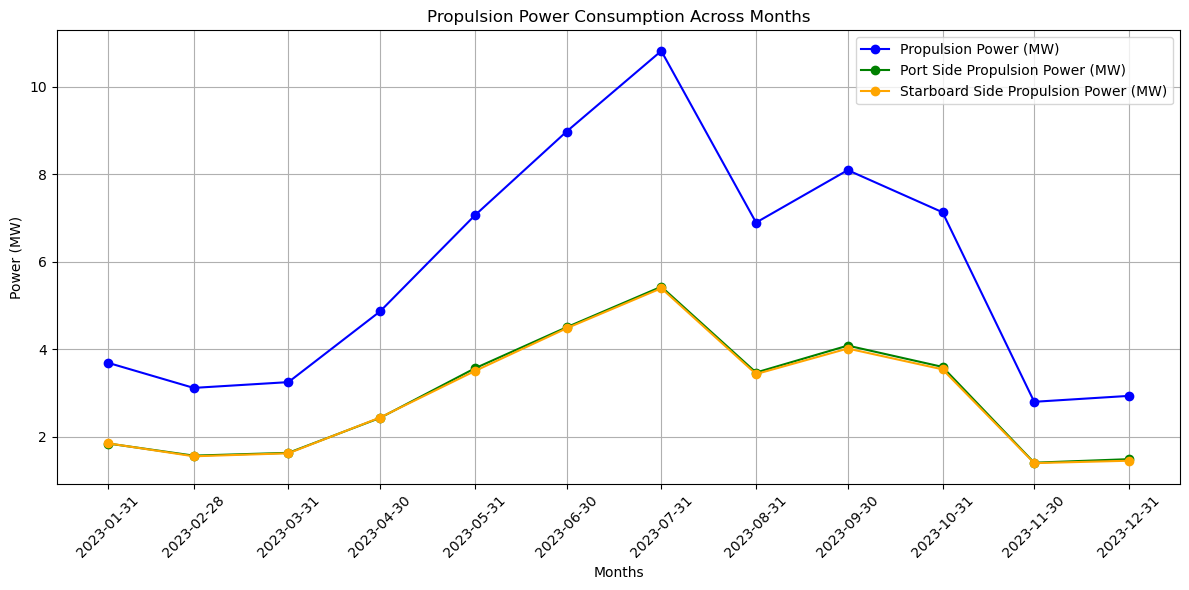

In [13]:
# Select relevant columns for propulsion system calculation
columns_of_interest = [
    'Propulsion Power (MW)',
    'Port Side Propulsion Power (MW)',
    'Starboard Side Propulsion Power (MW)'
]

# Assuming resampled_monthly is already defined or resampling has been done
# resampled_monthly = vessel_data[columns_of_interest].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting propulsion powers
plt.plot(resampled_monthly.index, resampled_monthly['Propulsion Power (MW)'], marker='o', linestyle='-', color='blue', label='Propulsion Power (MW)')
plt.plot(resampled_monthly.index, resampled_monthly['Port Side Propulsion Power (MW)'], marker='o', linestyle='-', color='green', label='Port Side Propulsion Power (MW)')
plt.plot(resampled_monthly.index, resampled_monthly['Starboard Side Propulsion Power (MW)'], marker='o', linestyle='-', color='orange', label='Starboard Side Propulsion Power (MW)')

# Set labels and title
plt.title('Propulsion Power Consumption Across Months')
plt.xlabel('Months')
plt.ylabel('Power (MW)')
plt.xticks(resampled_monthly.index, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### 1. Analysis of Speed and Propulsion Power

1. **Observations from the Graph:**
   - The graph depicts the variations in **Speed Over Ground** (blue line), **Speed Through Water** (orange line), and **Propulsion Power** (green line) over time.
   - Speed Over Ground and Speed Through Water show similar trends, reflecting the ship's movement relative to the ground and through the water.
   - Propulsion Power correlates with both Speed Over Ground and Speed Through Water, indicating higher power consumption to achieve higher speeds.

2. **Trends:**
   - **Speed Over Ground and Speed Through Water**: Both speeds generally rise and fall together, suggesting synchronized movement of the ship on the surface and through the water.
   - **Propulsion Power**: Peaks in propulsion power coincide with peaks in speed, illustrating the direct relationship between power consumption and speed.

3. **Reasons for Trends:**
   - **Hydrodynamic Resistance**: When the ship moves through water, it encounters resistance known as hydrodynamic drag.
     - To overcome this resistance and maintain or increase speed, the ship requires higher propulsion power.
   - **Operational Requirements**: Variations in speed are influenced by operational factors such as navigational routes and transit schedules.
     - Higher speeds during transit phases necessitate increased propulsion power to meet operational deadlines and schedules.



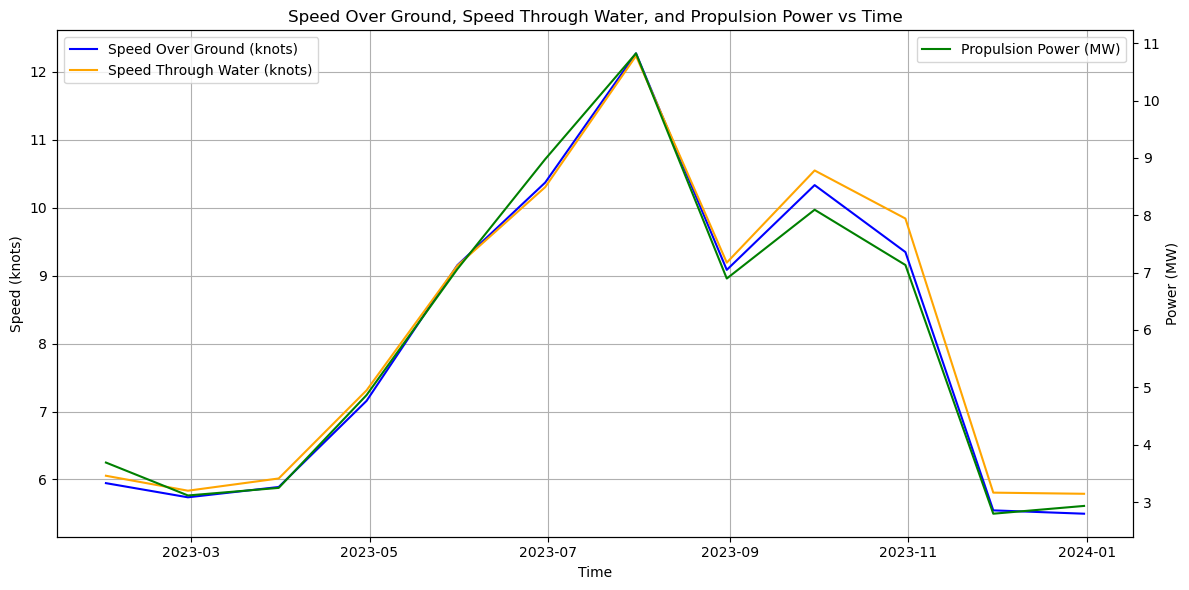

In [14]:
# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Speed Over Ground and Speed Through Water on the primary y-axis
ax1.plot(resampled_monthly.index, resampled_monthly['Speed Over Ground (knots)'], color='blue', label='Speed Over Ground (knots)')
ax1.plot(resampled_monthly.index, resampled_monthly['Speed Through Water (knots)'], color='orange', label='Speed Through Water (knots)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed (knots)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for Propulsion Power
ax2 = ax1.twinx()
ax2.plot(resampled_monthly.index, resampled_monthly['Propulsion Power (MW)'], color='green', label='Propulsion Power (MW)')
ax2.set_ylabel('Power (MW)')
ax2.legend(loc='upper right')

# Set the title
plt.title('Speed Over Ground, Speed Through Water, and Propulsion Power vs Time')

# Adjust layout and display
plt.tight_layout()
plt.show()

Slope Definition:
The slope in the context of this regression analysis represents the rate of increase in speed through water for each additional megawatt (MW) of propulsion power.
Specifically, a slope of 0.98 means that for every 1 MW increase in propulsion power, Vessel 2's speed through water increases by 0.99 knots. 


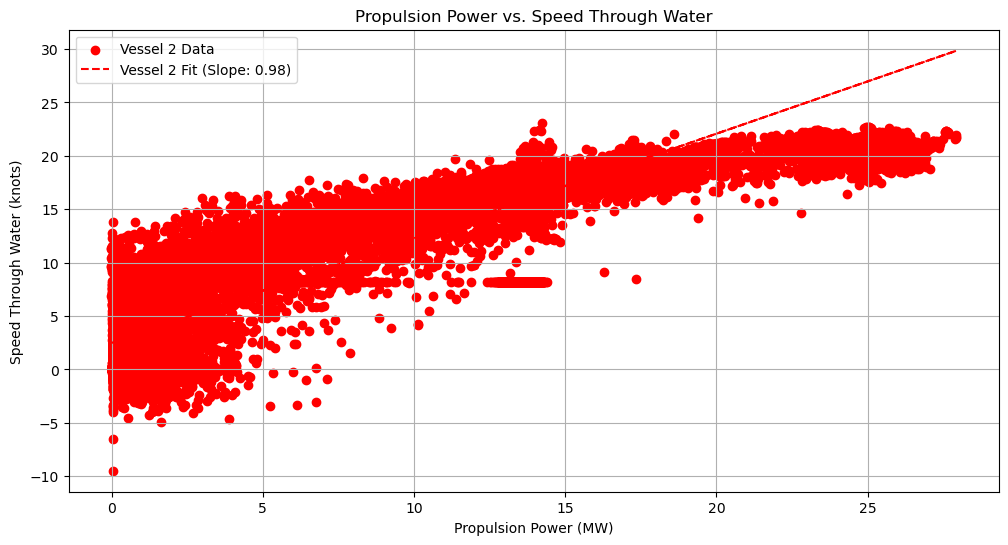

In [21]:


# Extract the relevant columns


speed_vessel2 = vessel2_data_filled['Speed Through Water (knots)'].values.reshape(-1, 1)
power_vessel2 = vessel2_data_filled['Propulsion Power (MW)'].values.reshape(-1, 1)

# Perform linear regression

model_vessel2 = LinearRegression().fit(power_vessel2, speed_vessel2)

# Get the coefficients

coef_vessel2 = model_vessel2.coef_[0][0]

# Predict speed through water using the model for plotting

pred_speed_vessel2 = model_vessel2.predict(power_vessel2)

# Plot the data
plt.figure(figsize=(12, 6))


plt.scatter(power_vessel2, speed_vessel2, color='red', label='Vessel 2 Data')
plt.plot(power_vessel2, pred_speed_vessel2, color='red', linestyle='--', label=f'Vessel 2 Fit (Slope: {coef_vessel2:.2f})')

plt.xlabel('Propulsion Power (MW)')
plt.ylabel('Speed Through Water (knots)')
plt.title('Propulsion Power vs. Speed Through Water')
plt.legend()
plt.grid(True)
plt.show()





---



---



Sea Temperture

#### 1. Analysis of Sea Temperature, HVAC Chillers, and Boiler Fuel Flow Rates

##### Sea Temperature and HVAC Chillers

We analyzed the relationship between sea temperature and the power consumption of three HVAC chillers. The following plots illustrate these relationships:

- **Sea Temperature (Celsius) vs Time**
- **HVAC Chiller 1 Power (MW) vs Time**
- **HVAC Chiller 2 Power (MW) vs Time**
- **HVAC Chiller 3 Power (MW) vs Time**


###### Observations:
1. **Sea Temperature and HVAC Chiller 1**:
    - There is an **inverse relationship** between sea temperature and HVAC Chiller 1 power consumption.
    - As the sea temperature increases, the power consumption of HVAC Chiller 1 decreases

2. **Sea Temperature and HVAC Chiller 3**:
    -  there is a **positive correlation** between sea temperature and HVAC Chiller 3 power consumption.
    - As the sea temperature increases, the power consumption of HVAC Chiller 3 also increases.

##### Sea Temperature and Boiler Fuel Flow Rates

We further examined the relationship between sea temperature and the fuel flow rates for Boiler 1 and Boiler 2. The following plots illustrate these relationships:

- **Sea Temperature (Celsius) and Boiler 1 Fuel Flow Rate (L/h) vs Time**
- **Sea Temperature (Celsius) and Boiler 2 Fuel Flow Rate (L/h) vs Time**



###### Observations:
1. **Sea Temperature and Boiler 1 Fuel Flow Rate**:
    - There is **no significant correlation** between sea temperature and Boiler 1 fuel flow rate.
    - Variations in sea temperature do not seem to affect the fuel flow rate of Boiler 1.

2. **Sea Temperature and Boiler 2 Fuel Flow Rate**:
    - Similar to Boiler 1, there is **no significant correlation** between sea temperature and Boiler 2 fuel flow rate.
    - Variations in sea temperature do not seem to affect the fuel flow rate of Boiler 2.

##### Conclusion

From the analysis, we can conclude:
- **Inverse correlation** between sea temperature and HVAC Chiller 1 power consumption.
- **Positive correlation** between sea temperature and the power consumption of HVAC Chillers 3.
- **No significant correlation** between sea temperature and the fuel flow rates of Boiler 1 and Boiler 2.

These findings help us understand how sea temperature impacts different components on the vessel, which is crucial for optimizing energy efficiency and operational planning.


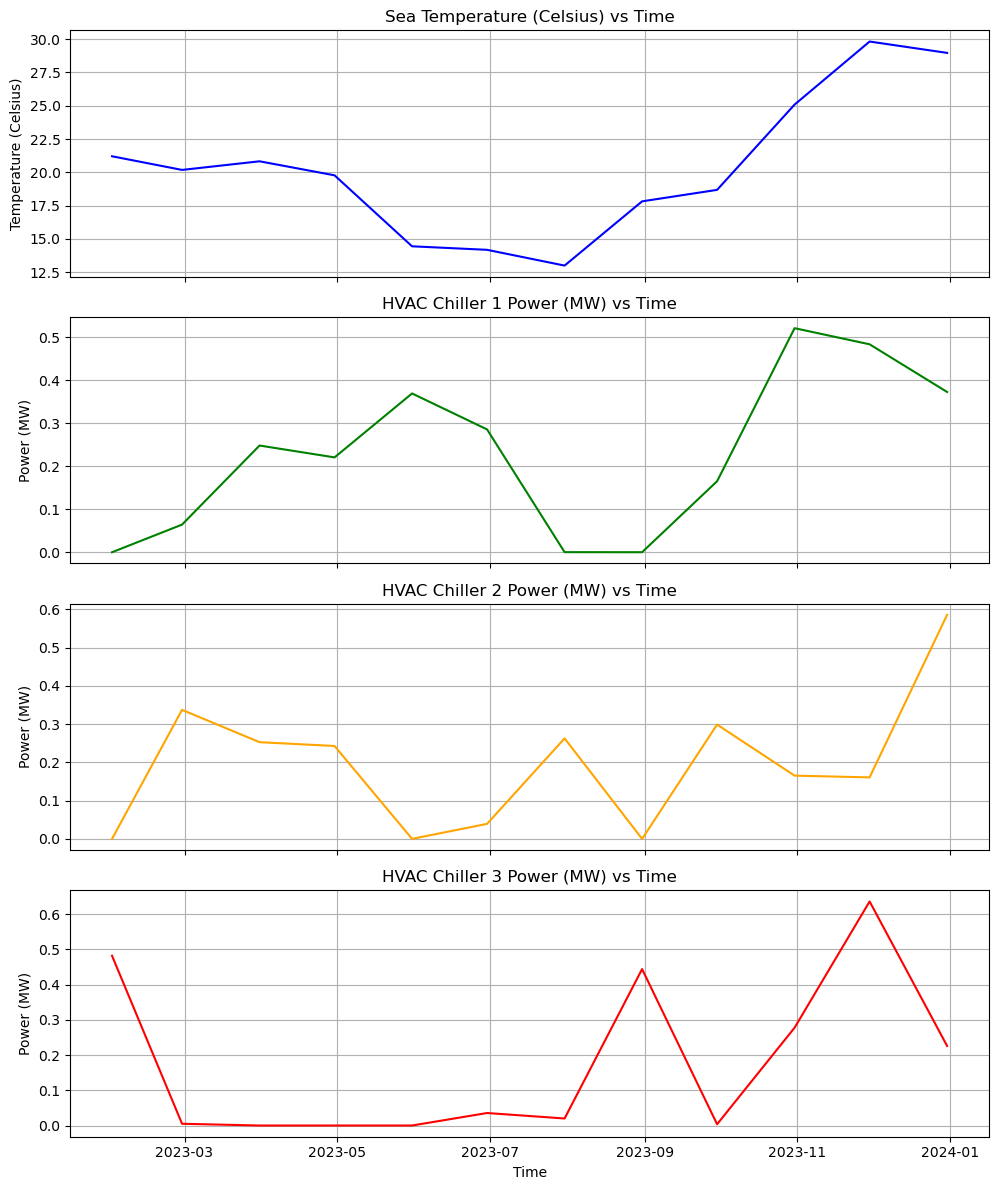

In [16]:


# Assuming you have already resampled the data as shown
# resampled_monthly

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

# Plot Sea Temperature
sea_temp_col = 'Sea Temperature (Celsius)'
axes[0].plot(resampled_monthly.index, resampled_monthly[sea_temp_col], color='blue')
axes[0].set_title(f'{sea_temp_col} vs Time')
axes[0].set_ylabel('Temperature (Celsius)')
axes[0].grid(True)

# Plot HVAC Chiller 1
hvac1_col = 'HVAC Chiller 1 Power (MW)'
axes[1].plot(resampled_monthly.index, resampled_monthly[hvac1_col], color='green')
axes[1].set_title(f'{hvac1_col} vs Time')
axes[1].set_ylabel('Power (MW)')
axes[1].grid(True)

# Plot HVAC Chiller 2
hvac2_col = 'HVAC Chiller 2 Power (MW)'
axes[2].plot(resampled_monthly.index, resampled_monthly[hvac2_col], color='orange')
axes[2].set_title(f'{hvac2_col} vs Time')
axes[2].set_ylabel('Power (MW)')
axes[2].grid(True)

# Plot HVAC Chiller 3
hvac3_col = 'HVAC Chiller 3 Power (MW)'
axes[3].plot(resampled_monthly.index, resampled_monthly[hvac3_col], color='red')
axes[3].set_title(f'{hvac3_col} vs Time')
axes[3].set_xlabel('Time')
axes[3].set_ylabel('Power (MW)')
axes[3].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()



#### 2.Analysis of Boiler Fuel Flow Rates and Sea Temperature for Vessel 2

#### Graph Description

This figure presents two subplots depicting the relationship between Boiler Fuel Flow Rates and Sea Temperature over time for Vessel 2.

#### Upper Subplot: Boiler 1 Fuel Flow Rate and Sea Temperature

- **Sea Temperature (Celsius)**: Plotted in blue, represents the variation in sea temperature over time.
- **Boiler 1 Fuel Flow Rate (L/h)**: Plotted in green on the secondary y-axis, shows the volumetric flow rate of fuel for Boiler 1 over the same period.

#### Lower Subplot: Boiler 2 Fuel Flow Rate and Sea Temperature

- **Sea Temperature (Celsius)**: Also plotted in blue for consistency across subplots.
- **Boiler 2 Fuel Flow Rate (L/h)**: Shown in red on the secondary y-axis, illustrates the volumetric flow rate of fuel for Boiler 2 during the specified time frame.

#### Trends Analysis

For Vessel 2, the relationship between Sea Temperature and Boiler Fuel Flow Rates shows interesting dynamics:

- **Initial Relationship**: Initially, there is a discernible relationship where changes in Sea Temperature correspond to changes in Boiler Fuel Flow Rates.
  
- **Anomaly in the 8th Month**: At around the 8th month, there is an anomaly where a decrease in Sea Temperature coincides with an increase in Boiler Fuel Flow Rates. This suggests a temporary reversal in the expected trend.
  
- **Return to Normalcy**: Following the anomaly, the relationship between Sea Temperature and Boiler Fuel Flow Rates returns to a more typical pattern, where higher Sea Temperatures correlate with lower Boiler Fuel Flow Rates and vice versa.

#### Reasons for the Observed Trends

The observed anomalies and subsequent return to the expected trend can be attributed to several factors specific to Vessel 2:

- **Operational Adjustments**: Changes in Boiler Fuel Flow Rates may be due to operational adjustments or maintenance activities occurring around the 8th month, temporarily disrupting the usual correlation with Sea Temperature.
  
- **Environmental Variability**: Natural variability in environmental conditions, such as local weather patterns or seasonal changes, can influence the thermal dynamics of the vessel's systems and affect fuel consumption rates.
  
- **System Response**: The vessel's control and regulation systems may respond differently to variations in Sea Temperature depending on the specific operational settings or conditions during different months.

In conclusion, analyzing the relationship between Sea Temperature and Boiler Fuel Flow Rates for Vessel 2 highlights the variability and complexity of environmental and operational factors impacting fuel consumption on maritime vessels.


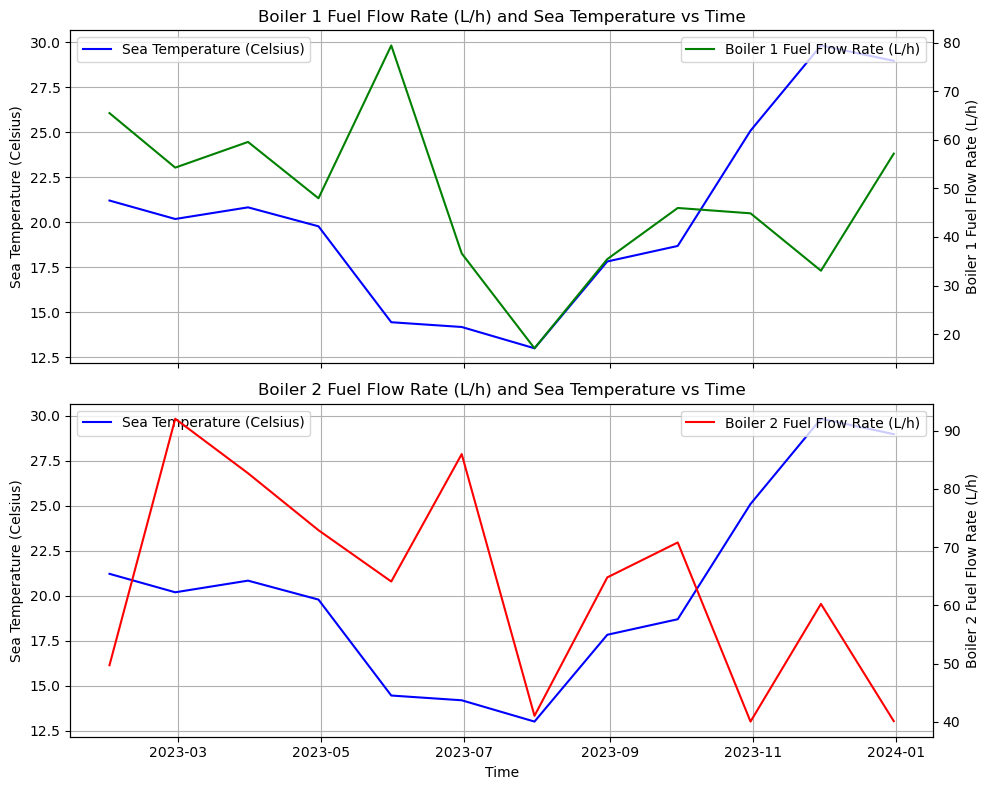

In [17]:
# Columns of interest
sea_temperature_col = 'Sea Temperature (Celsius)'
boiler_fuel_flow_cols = ['Boiler 1 Fuel Flow Rate (L/h)', 'Boiler 2 Fuel Flow Rate (L/h)']

# Create a figure with subplots for Boiler 1 and Boiler 2 Fuel Flow Rates
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot Boiler 1 Fuel Flow Rate against Sea Temperature
axes[0].plot(resampled_monthly.index, resampled_monthly[sea_temperature_col], color='blue', label='Sea Temperature (Celsius)')
axes[0].set_ylabel('Sea Temperature (Celsius)')
axes[0].set_title('Boiler 1 Fuel Flow Rate (L/h) and Sea Temperature vs Time')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Create a twin axis to plot the fuel flow rate
ax0_twin = axes[0].twinx()
ax0_twin.plot(resampled_monthly.index, resampled_monthly[boiler_fuel_flow_cols[0]], color='green', label='Boiler 1 Fuel Flow Rate (L/h)')
ax0_twin.set_ylabel('Boiler 1 Fuel Flow Rate (L/h)')
ax0_twin.legend(loc='upper right')

# Plot Boiler 2 Fuel Flow Rate against Sea Temperature
axes[1].plot(resampled_monthly.index, resampled_monthly[sea_temperature_col], color='blue', label='Sea Temperature (Celsius)')
axes[1].set_ylabel('Sea Temperature (Celsius)')
axes[1].set_title('Boiler 2 Fuel Flow Rate (L/h) and Sea Temperature vs Time')
axes[1].set_xlabel('Time')
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Create a twin axis to plot the fuel flow rate
ax1_twin = axes[1].twinx()
ax1_twin.plot(resampled_monthly.index, resampled_monthly[boiler_fuel_flow_cols[1]], color='red', label='Boiler 2 Fuel Flow Rate (L/h)')
ax1_twin.set_ylabel('Boiler 2 Fuel Flow Rate (L/h)')
ax1_twin.legend(loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()
